# **Entendimeinto del negocio**
Entidad fianriera entender el repcio de siversos activos con el objetivo de entender a futuro a la luz de las necesidades de sus clientes

# **Enfoque analitico**
Desarrollar un modelo basado en series de tiempo que permite predecir, con el menor error posible, el valor futuro del rpecio de un activo

# **Librerias**

In [39]:
!pip install yfinance
!pip install keras
!pip install tensorflow
!pip install mplfinance


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [40]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,LSTM
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score,mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

Exploracion mediante velas jap

In [41]:
PG=yf.download('PG',start='2022-01-01',end='2024-10-29')
PG

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG,PG
Date,,,,,,
2022-01-03 00:00:00+00:00,151.253067,162.899994,162.940002,159.880005,161.690002,9317300
2022-01-04 00:00:00+00:00,151.782303,163.470001,164.389999,162.179993,162.289993,9253800
2022-01-05 00:00:00+00:00,152.469376,164.210007,165.320007,163.399994,163.440002,9330200
2022-01-06 00:00:00+00:00,151.188049,162.830002,165.199997,162.610001,164.339996,7556000
2022-01-07 00:00:00+00:00,151.104492,162.740005,163.529999,161.949997,163.130005,6098500
...,...,...,...,...,...,...
2024-10-22 00:00:00+00:00,169.699997,169.699997,170.729996,168.570007,168.570007,7511400
2024-10-23 00:00:00+00:00,169.580002,169.580002,170.169998,168.729996,169.550003,4837800


In [42]:
PG_2=pd.DataFrame()
PG_2['Open']=PG['Open']
PG_2['High']=PG['High']
PG_2['Low']=PG['Low']
PG_2['Close']=PG['Close']
PG_2
               


,Open,High,Low,Close
Date,,,,
2022-01-03 00:00:00+00:00,161.690002,162.940002,159.880005,162.899994
2022-01-04 00:00:00+00:00,162.289993,164.389999,162.179993,163.470001
2022-01-05 00:00:00+00:00,163.440002,165.320007,163.399994,164.210007
2022-01-06 00:00:00+00:00,164.339996,165.199997,162.610001,162.830002
2022-01-07 00:00:00+00:00,163.130005,163.529999,161.949997,162.740005
...,...,...,...,...
2024-10-22 00:00:00+00:00,168.570007,170.729996,168.570007,169.699997
2024-10-23 00:00:00+00:00,169.550003,170.169998,168.729996,169.580002
2024-10-24 00:00:00+00:00,169.419998,169.960007,168.929993,169.619995


<Figure size 1000x2000 with 0 Axes>

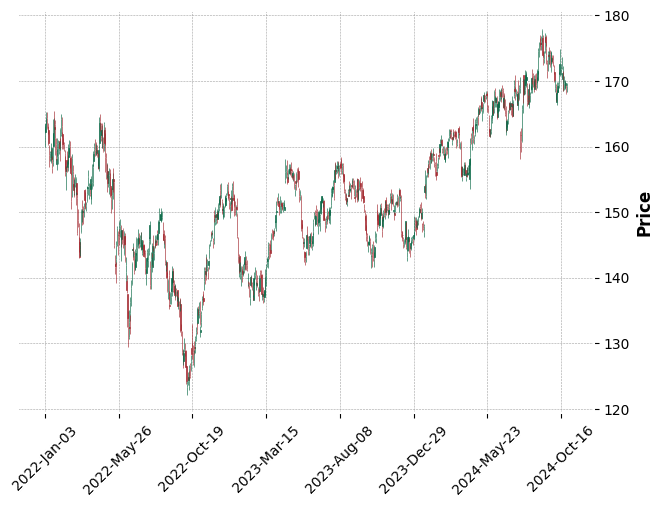

In [43]:
plt.figure(figsize=(10,20))
mpl.plot(PG_2,type='candle',style='charles')

<Figure size 1000x2000 with 0 Axes>

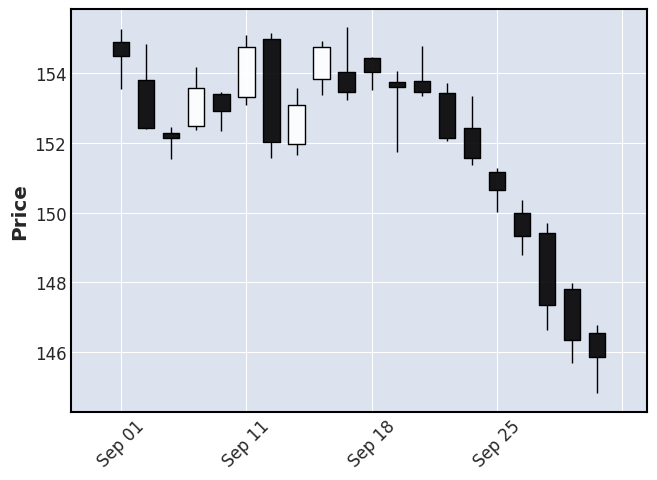

In [44]:
plt.figure(figsize=(10,20))
mpl.plot(PG_2.loc['2023-09-01':'2023-09-30'],type='candle')

In [45]:
activos=['TSLA','META','GE','AAPL']
data=pd.DataFrame()
for i in activos:
  data[i]=yf.download(i,start='2022-01-01',end='2024-10-29')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


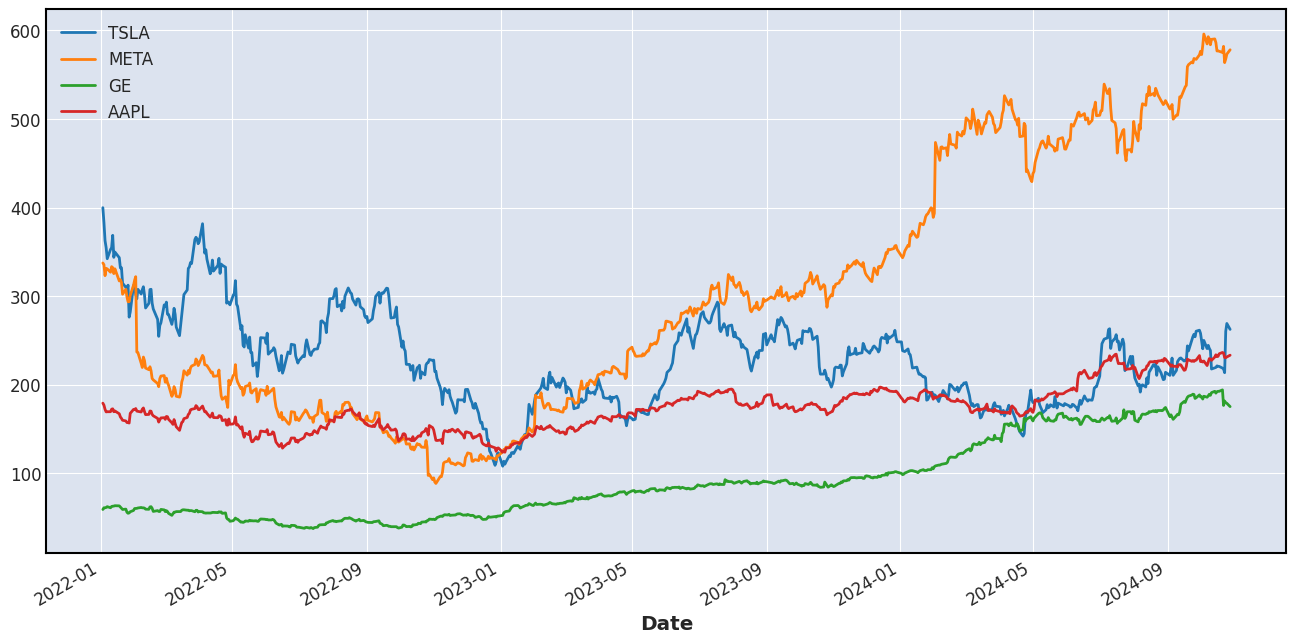

In [46]:
data.plot(figsize=(16,8))
plt.show()

PORTFOLIO

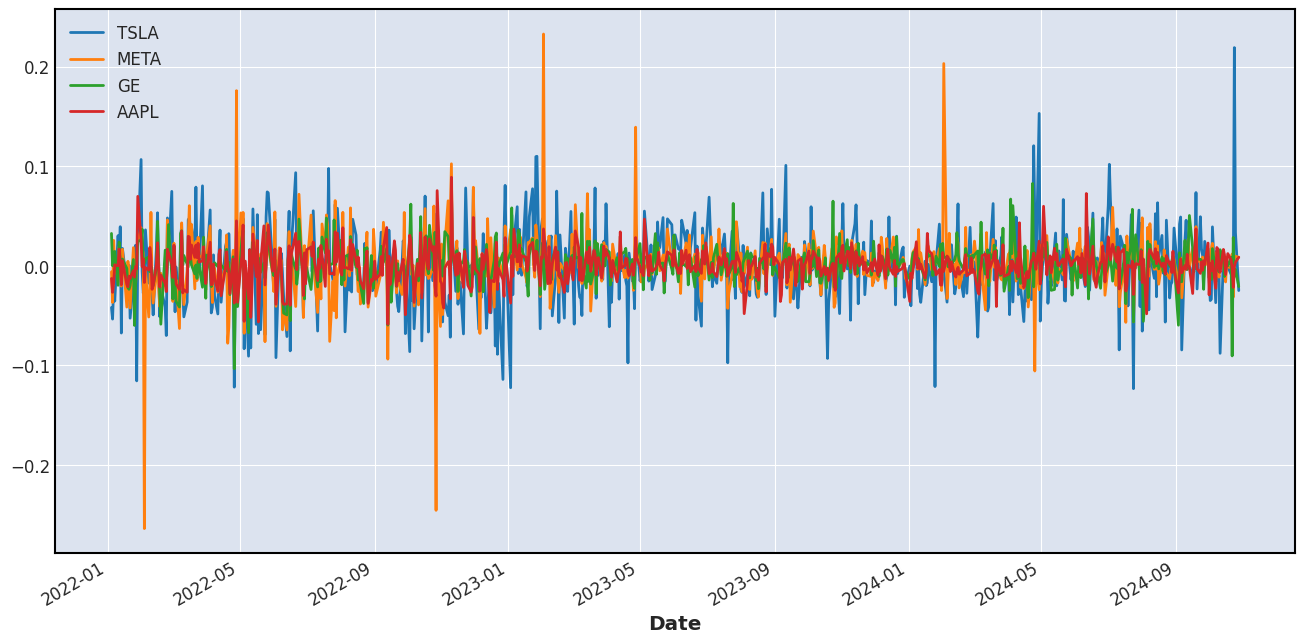

In [47]:
#Retorno simple
ret_simple=data.pct_change().dropna()
ret_simple.plot(figsize=(16,8))
plt.show()

Retorno Logaritmico
Eliminar las tendecnias exponenciales

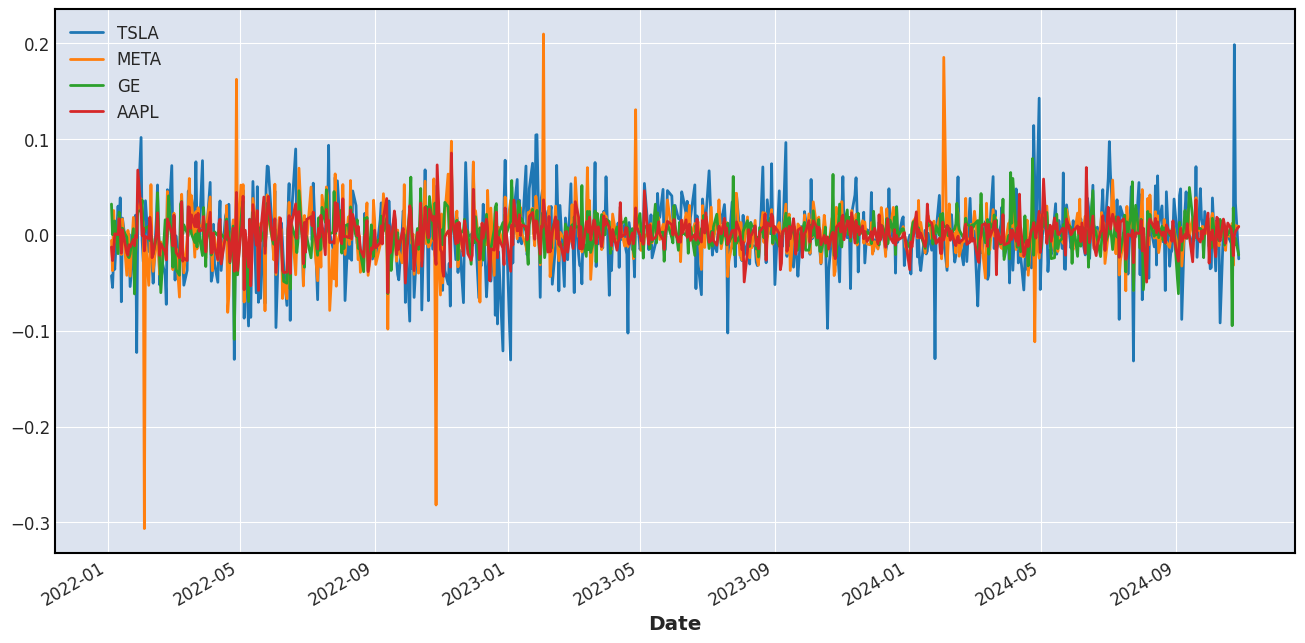

In [48]:
ret_log=np.log(data).diff().dropna()
ret_log.plot(figsize=(16,8))
plt.show()

# Rentabilidad

In [54]:
pesos= [0.25,0.25,0.25,0.25]
rentabilidad_portafolio=np.dot(ret_simple.mean()*252,pesos)

# Riesgo


In [55]:
riesgo_portafolio=np.sqrt(np.dot(np.transpose(pesos),np.dot(ret_log.cov()*252,pesos)))

In [56]:
print('Rentabilidad del portafolio:',rentabilidad_portafolio)
print('Riesgo del portafolio:',riesgo_portafolio)

Rentabilidad del portafolio: 0.2287163306065101
Riesgo del portafolio: 0.31359886063083403
